# Psychsignal

This notebook is inspired by [How to Get an Allocation: Writing an Algorithm for the Quantopian Investment Management Team](https://www.quantopian.com/posts/how-to-get-an-allocation-writing-an-algorithm-for-the-quantopian-investment-management-team) by Jamie McCorriston.

[Access Twitter and StockTwits Trader Mood data for Free (and speaking opportunity)](https://www.quantopian.com/posts/access-twitter-and-stocktwits-trader-mood-data-for-free-and-speaking-opportunity)

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import blaze as bz
from zipline.utils.tradingcalendar import get_trading_days

from quantopian.interactive.data.psychsignal import stocktwits 

Interactive datasets are [Blaze expressions](http://blaze.readthedocs.io/en/latest/interactivity.html). Blaze expressions have a similar API to pandas, with some [differences](http://blaze.readthedocs.io/en/latest/rosetta-pandas.html).

In [4]:
type(stocktwits)

<class 'blaze.expr.expressions.Field'>

In [5]:
stocktwits.fields

[u'source',
 u'symbol',
 u'bullish_intensity',
 u'bearish_intensity',
 u'bull_minus_bear',
 u'bull_scored_messages',
 u'bear_scored_messages',
 u'bull_bear_msg_ratio',
 u'total_scanned_messages',
 u'sid',
 u'asof_date',
 u'timestamp']

In [6]:
stocktwits

,source,symbol,bullish_intensity,bearish_intensity,bull_minus_bear,bull_scored_messages,bear_scored_messages,bull_bear_msg_ratio,total_scanned_messages,sid,asof_date,timestamp
0,stocktwits,AA,1.19,0.00,1.19,1.0,0.0,0.0,2.0,2,2009-08-24 04:00:00,2009-08-25 04:00:00
1,stocktwits,AA,1.33,0.00,1.33,1.0,0.0,0.0,2.0,2,2009-09-03 04:00:00,2009-09-04 04:00:00
2,stocktwits,AA,2.50,2.30,0.20,1.0,1.0,1.0,2.0,2,2009-09-10 04:00:00,2009-09-11 04:00:00
3,stocktwits,AA,2.40,0.00,2.40,1.0,0.0,0.0,2.0,2,2009-09-11 04:00:00,2009-09-12 04:00:00
4,stocktwits,AA,0.00,0.00,0.00,0.0,0.0,0.0,2.0,2,2009-09-15 04:00:00,2009-09-16 04:00:00
5,stocktwits,AA,1.82,2.39,-0.57,2.0,1.0,2.0,3.0,2,2009-09-22 04:00:00,2009-09-23 04:00:00
6,stocktwits,AA,0.00,0.00,0.00,0.0,0.0,0.0,1.0,2,2009-09-27 04:00:00,2009-09-28 04:00:00
7,stocktwits,AA,0.00,0.09,-0.09,0.0,1.0,0.0,1.0,2,2009-09-30 04:00:00,2009-10-01 04:00:00
8,stocktwits,AA,0.00,0.00,0.00,0.0,0.0,0.0,1.0,2,2009-10-03 04:00:00,2009-10-04 04:00:00
9,stocktwits,AA,2.20,0.00,2.20,2.0,0.0,0.0,3.0,2,2009-10-06 04:00:00,2009-10-07 04:00:00


In [7]:
stocktwits.bull_minus_bear.head(5)

,bull_minus_bear
0,1.19
1,1.33
2,0.20
3,2.40
4,0.00


## Extract to explore the data

In [8]:
bmb = bz.compute(stocktwits.bull_minus_bear)

In [9]:
type(bmb)

<class 'pandas.core.series.Series'>

In [10]:
bmb.head()

0    1.19
1    1.33
2    0.20
3    2.40
4    0.00
Name: bull_minus_bear, dtype: float64

In [11]:
bmb.describe()

count    10001.000000
mean         0.364485
std          1.165769
min         -4.000000
25%         -0.070000
50%          0.000000
75%          1.130000
max          3.890000
Name: bull_minus_bear, dtype: float64

In [13]:
bmb.median()

0.0

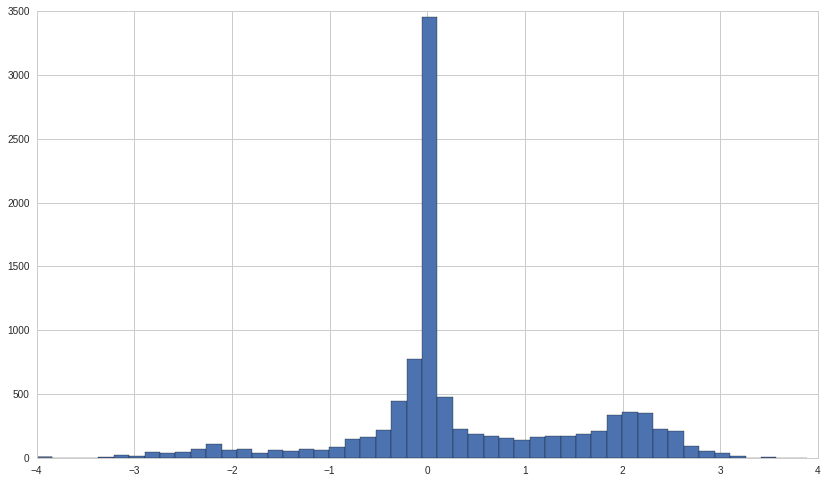

In [15]:
bmb.hist(bins=50);

In [46]:
len(bmb[bmb < -2])

386

In [49]:
len(bmb[bmb > 2.5])

361

# Explore Apple

In [17]:
aapl_sid = symbols('AAPL').sid

In [18]:
aapl_sid

24

In [19]:
stocktwits[stocktwits.sid == aapl_sid].peek()

,source,symbol,bullish_intensity,bearish_intensity,bull_minus_bear,bull_scored_messages,bear_scored_messages,bull_bear_msg_ratio,total_scanned_messages,sid,asof_date,timestamp
0,stocktwits,AAPL,2.30,0.00,2.30,1.0,0.0,0.0,1.0,24,2009-07-10 04:00:00,2009-07-11 04:00:00
1,stocktwits,AAPL,0.00,0.00,0.00,0.0,0.0,0.0,3.0,24,2009-07-11 04:00:00,2009-07-12 04:00:00
2,stocktwits,AAPL,0.00,2.80,-2.80,0.0,1.0,0.0,4.0,24,2009-07-13 04:00:00,2009-07-14 04:00:00
3,stocktwits,AAPL,0.00,0.00,0.00,0.0,0.0,0.0,1.0,24,2009-07-28 04:00:00,2009-07-29 04:00:00
4,stocktwits,AAPL,0.00,2.15,-2.15,0.0,1.0,0.0,2.0,24,2009-07-30 04:00:00,2009-07-31 04:00:00
5,stocktwits,AAPL,0.00,0.00,0.00,0.0,0.0,0.0,1.0,24,2009-07-31 04:00:00,2009-08-01 04:00:00
6,stocktwits,AAPL,0.00,0.00,0.00,0.0,0.0,0.0,2.0,24,2009-08-04 04:00:00,2009-08-05 04:00:00
7,stocktwits,AAPL,2.88,0.00,2.88,1.0,0.0,0.0,1.0,24,2009-08-14 04:00:00,2009-08-15 04:00:00
8,stocktwits,AAPL,0.00,2.00,-2.00,0.0,2.0,0.0,2.0,24,2009-08-18 04:00:00,2009-08-19 04:00:00
9,stocktwits,AAPL,0.00,0.00,0.00,0.0,0.0,0.0,1.0,24,2009-08-21 04:00:00,2009-08-22 04:00:00


In [20]:
stocktwits[(stocktwits.sid == aapl_sid) & (stocktwits.asof_date >= '2013-12-01')].peek()

,source,symbol,bullish_intensity,bearish_intensity,bull_minus_bear,bull_scored_messages,bear_scored_messages,bull_bear_msg_ratio,total_scanned_messages,sid,asof_date,timestamp
0,stocktwits,AAPL,1.82,1.86,-0.04,71.0,34.0,2.09,344.0,24,2013-12-01 05:00:00,2013-12-02 05:00:00
1,stocktwits,AAPL,1.70,1.66,0.04,368.0,181.0,2.03,1374.0,24,2013-12-02 05:00:00,2013-12-03 05:00:00
2,stocktwits,AAPL,1.75,1.66,0.09,481.0,196.0,2.45,1806.0,24,2013-12-03 05:00:00,2013-12-04 05:00:00
3,stocktwits,AAPL,1.77,1.46,0.31,486.0,258.0,1.88,2077.0,24,2013-12-04 05:00:00,2013-12-05 05:00:00
4,stocktwits,AAPL,1.69,1.63,0.06,536.0,325.0,1.65,2307.0,24,2013-12-05 05:00:00,2013-12-06 05:00:00
5,stocktwits,AAPL,1.70,1.64,0.06,456.0,231.0,1.97,1780.0,24,2013-12-06 05:00:00,2013-12-07 05:00:00
6,stocktwits,AAPL,1.79,1.77,0.02,46.0,24.0,1.92,246.0,24,2013-12-07 05:00:00,2013-12-08 05:00:00
7,stocktwits,AAPL,1.75,1.50,0.25,57.0,28.0,2.04,366.0,24,2013-12-08 05:00:00,2013-12-09 05:00:00
8,stocktwits,AAPL,1.75,1.59,0.16,311.0,129.0,2.41,1211.0,24,2013-12-09 05:00:00,2013-12-10 05:00:00
9,stocktwits,AAPL,1.79,1.56,0.23,277.0,126.0,2.20,1329.0,24,2013-12-10 05:00:00,2013-12-11 05:00:00


In [21]:
bz.compute(stocktwits.sid.distinct().count())

9228

# AAPL. Selection of Date

In [22]:
date_mask = (stocktwits.asof_date >= '2013-12-01') & (stocktwits.asof_date <= '2014-12-01')

In [23]:
stock_mask = (stocktwits.sid == aapl_sid)

In [24]:
stocktwits_2014_expr = stocktwits[date_mask & stock_mask].sort('asof_date')

# Compute the expression

In [25]:
stocktwits_2014_df = bz.compute(stocktwits_2014_expr)

In [26]:
type(stocktwits_2014_df)

<class 'pandas.core.frame.DataFrame'>

In [27]:
stocktwits_2014_df.columns

Index([u'source', u'symbol', u'bullish_intensity', u'bearish_intensity',
       u'bull_minus_bear', u'bull_scored_messages', u'bear_scored_messages',
       u'bull_bear_msg_ratio', u'total_scanned_messages', u'sid', u'asof_date',
       u'timestamp'],
      dtype='object')

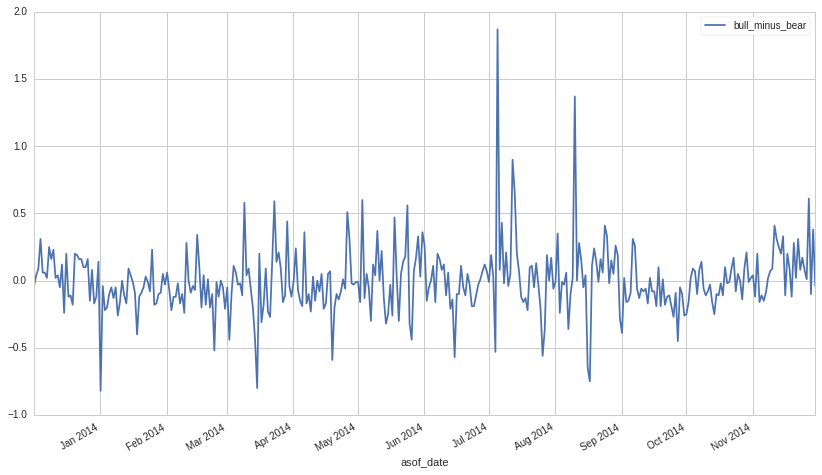

In [28]:
stocktwits_2014_df.plot(x='asof_date', y='bull_minus_bear');

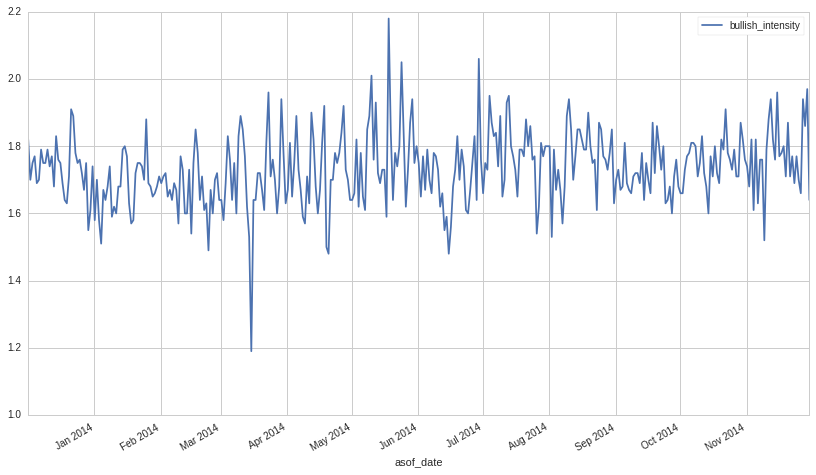

In [30]:
stocktwits_2014_df.plot(x='asof_date', y='bullish_intensity');

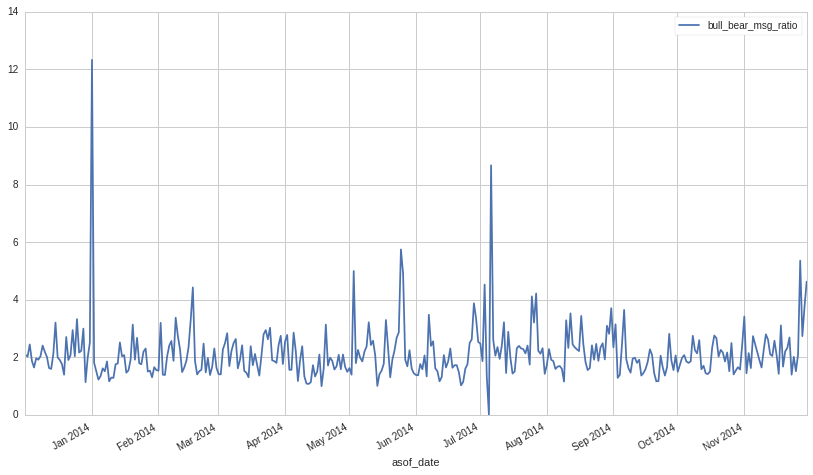

In [32]:
stocktwits_2014_df.plot(x='asof_date', y='bull_bear_msg_ratio');

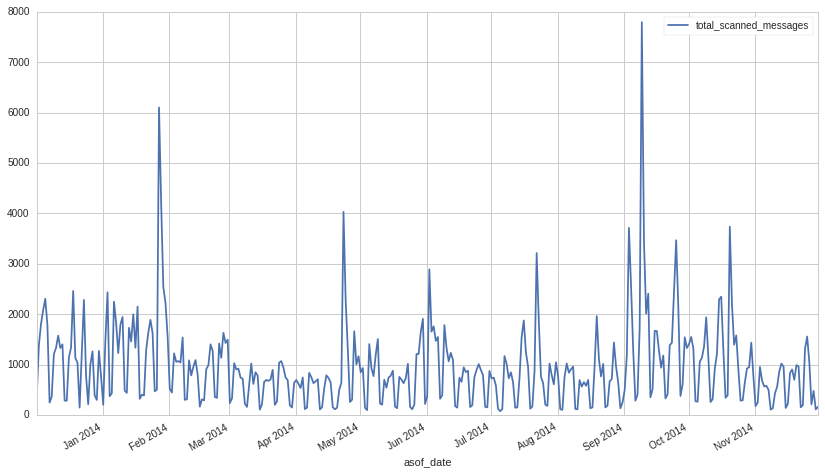

In [33]:
stocktwits_2014_df.plot(x='asof_date', y='total_scanned_messages');

# Define Our Factor

Now that we have a dataset that we want to use, let's use it in a [pipeline](https://www.quantopian.com/tutorials/pipeline). 

In addition to the sentiment dataset, we will also use 

   * [EventVestor Earnings Calendar](https://www.quantopian.com/data/eventvestor/earnings_calendar) dataset to [avoid trading around earnings announcements](https://www.quantopian.com/posts/event-study-the-rising-impact-of-earnings-on-stock-returns)
   
   * [EventVestor Mergers & Acquisitions](https://www.quantopian.com/data/eventvestor/mergers_and_acquisitions) dataset to avoid trading acquisition targets. 
   
   
We will work with the free versions of these datasets.

In [36]:
from quantopian.pipeline import Pipeline
from quantopian.research import run_pipeline

from quantopian.pipeline.filters.morningstar import Q1500US
from quantopian.pipeline.data.psychsignal import stocktwits

from quantopian.pipeline.factors.eventvestor import (
     BusinessDaysUntilNextEarnings,
     BusinessDaysSincePreviousEarnings,
)

from quantopian.pipeline.filters.eventvestor import IsAnnouncedAcqTarget

from quantopian.pipeline.factors import BusinessDaysSincePreviousEvent

In [37]:
def make_pipe():
    
    sentiment_factor = stocktwits.bull_minus_bear.latest
    
    not_near_earnings_announcement = ~((BusinessDaysUntilNextEarnings() <= 2)
                                    |(BusinessDaysSincePreviousEarnings() <= 2))
    
    new_info = (BusinessDaysSincePreviousEvent(inputs=[stocktwits.asof_date.latest]) <= 1)
    
    not_accounced_acq_target = ~IsAnnouncedAcqTarget()
    
    universe = (Q1500US()
               & sentiment_factor.notnull()
               & not_near_earnings_announcement
               & not_accounced_acq_target
               & new_info)
    
    pipe = Pipeline(
           columns = {
               'sentiment': sentiment_factor.rank(mask=universe, method='average'),
           },
        screen=universe
    )
    
    return pipe

In [38]:
result = run_pipeline(make_pipe(), start_date='2013-12-01', end_date='2014-12-01')

In [39]:
result.head()

sentiment
2013-12-02 00:00:00+00:00 Equity(2 [ARNC])        254.0
                          Equity(24 [AAPL])        74.0
                          Equity(67 [ADSK])       254.0
                          Equity(88 [ACI])        548.5
                          Equity(114 [ADBE])      254.0

****

# Part 3 - Analze Our Factor Using Alphalens

In [40]:
assets = result.index.levels[1].unique()

In [41]:
len(assets)

1620

In [42]:
pricing = get_pricing(assets, start_date='2013-12-01', end_date='2015-01-01', fields='open_price')

In [43]:
import alphalens

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:4: DeprecationWarning: This function is deprecated and will be removed in the future. Please use the new API instead.


Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,1.0,470.5,258.504740,124.315717,126276,60.150619
2,121.0,1044.0,678.170942,134.274611,83657,39.849381


Returns Analysis


,1,5,10,20
Ann. alpha,0.054,0.019,0.019,0.013
beta,-0.018,-0.032,-0.030,-0.012
Mean Period Wise Return Top Quantile (bps),1.164,0.085,-1.766,-6.171
Mean Period Wise Return Bottom Quantile (bps),-0.771,-0.056,1.170,4.088
Mean Period Wise Spread (bps),2.169,-0.073,-0.396,-0.546


Information Analysis


,1,5,10,20
IC Mean,0.007,0.005,0.010,0.010
IC Std.,0.045,0.043,0.045,0.042
t-stat(IC),2.553,1.769,3.488,3.766
p-value(IC),0.011,0.078,0.001,0.000
IC Skew,0.256,0.308,0.547,0.104
IC Kurtosis,0.573,0.473,2.622,1.181
Ann. IR,2.553,1.769,3.488,3.766


Turnover Analysis


,1,5,10,20
Quantile 1 Mean Turnover,0.558,0.619,0.623,0.626
Quantile 2 Mean Turnover,0.595,0.670,0.675,0.678


,1,5,10,20
Mean Factor Rank Autocorrelation,0.122,0.044,0.036,0.034


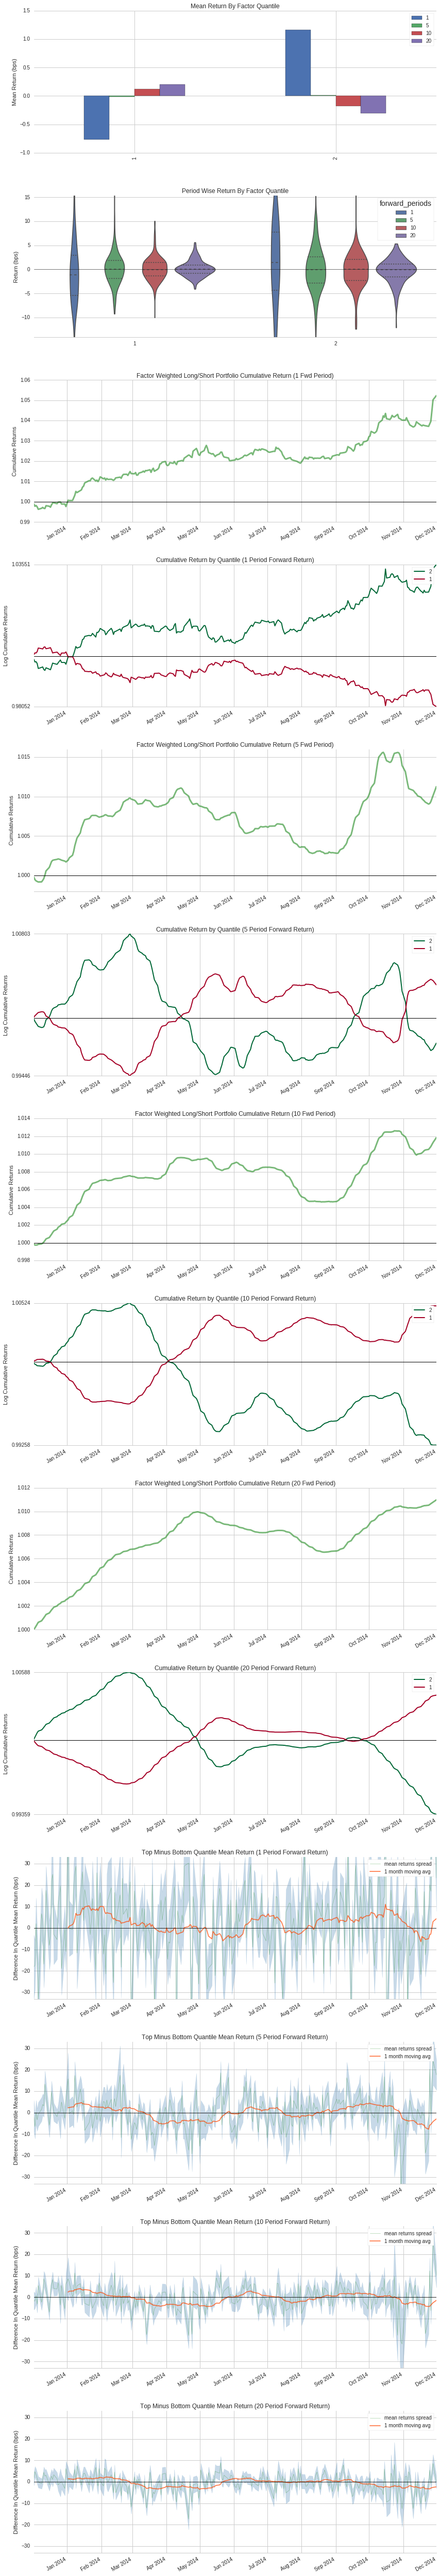

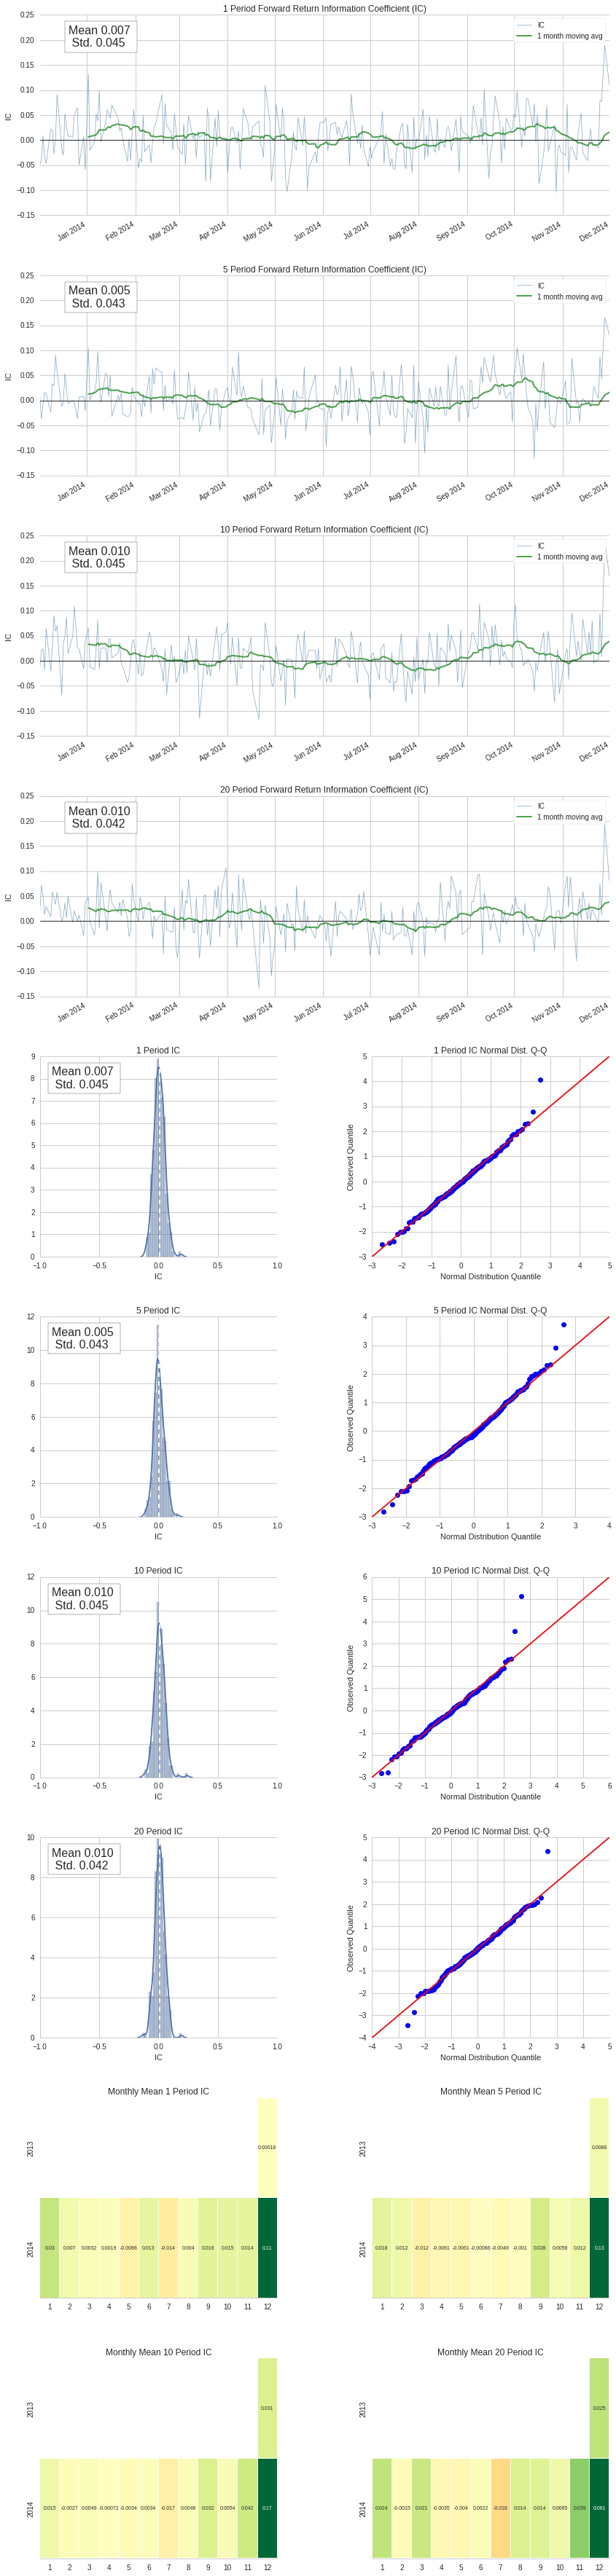

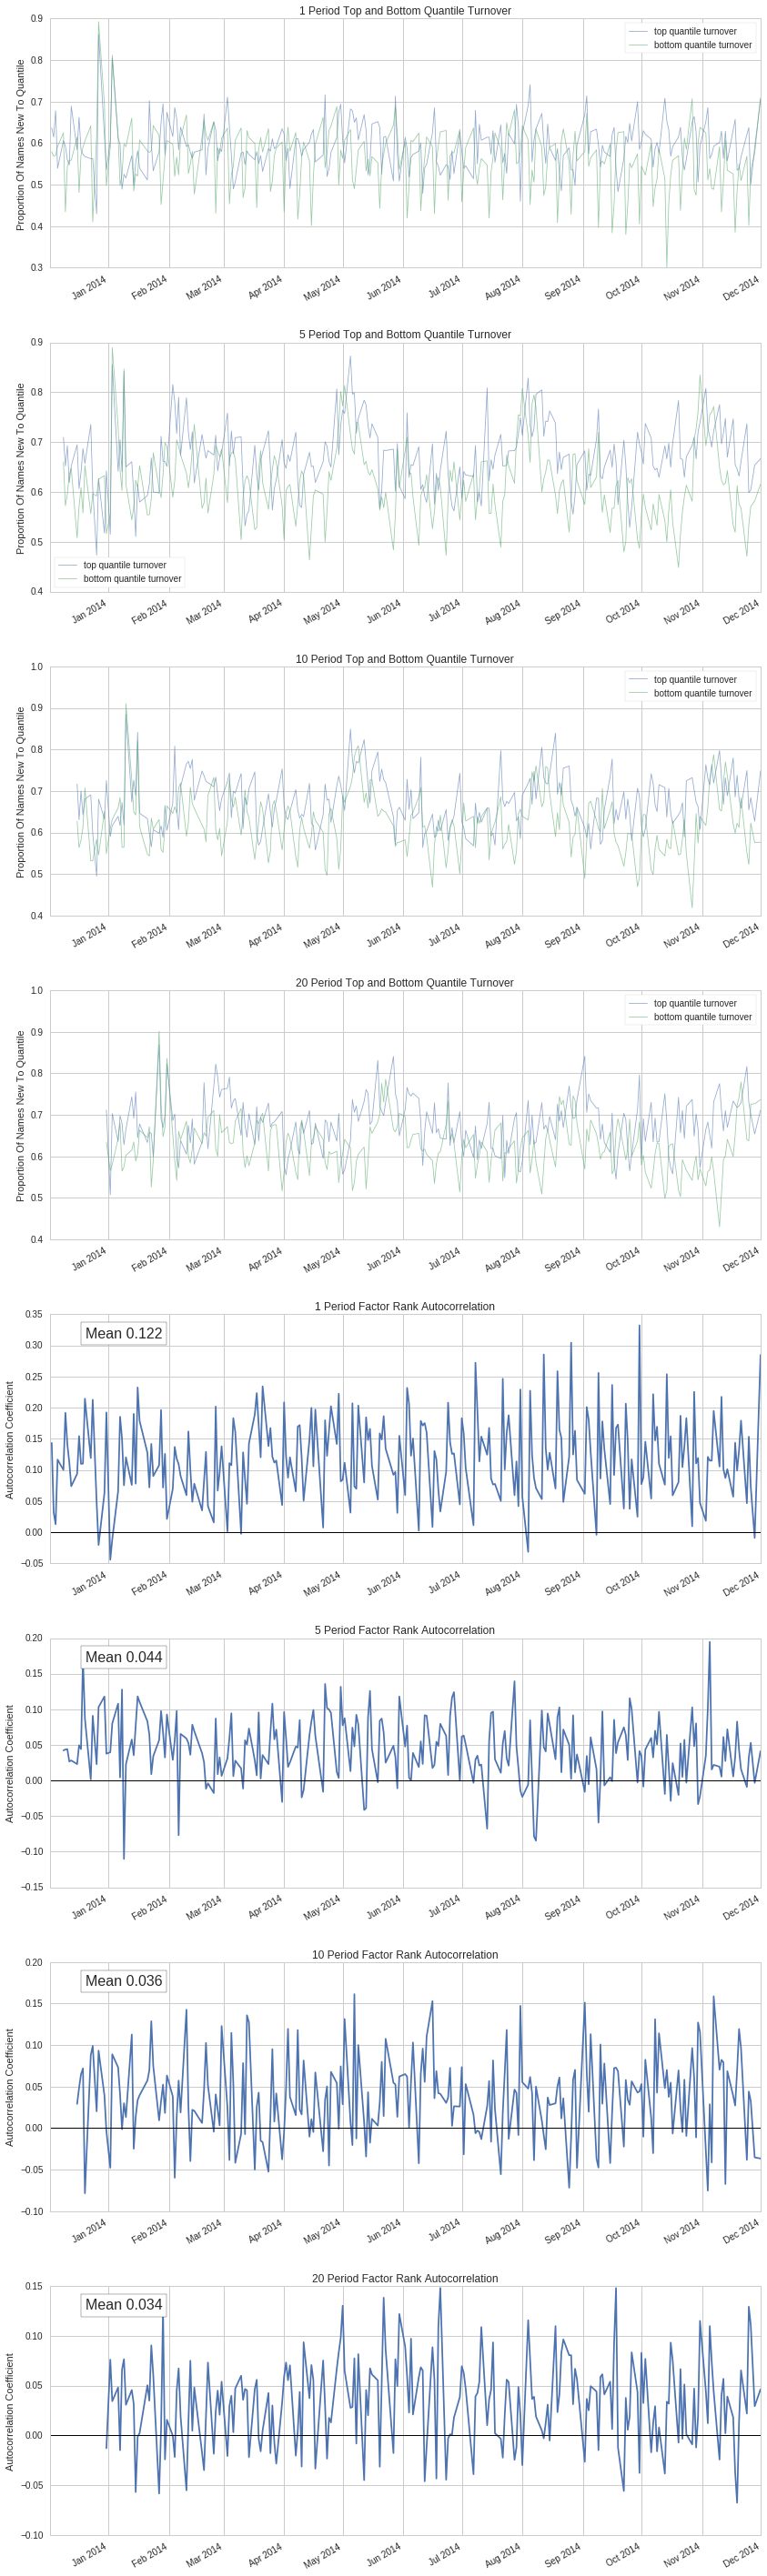

In [45]:
alphalens.tears.create_factor_tear_sheet(factor = result['sentiment'],
                                         prices=pricing,
                                         quantiles=2,
                                         periods=(1,5,10,20))